<a href="https://colab.research.google.com/github/rikanga/Easy-Numpy/blob/main/UncertainEstimatesClassifiers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Estimaton de l'incertitude dans le modèle**

In [21]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.datasets import make_blobs, make_circles
from sklearn.model_selection import train_test_split

In [22]:
X, y = make_circles(noise=.25, factor=0.5, random_state=1)

In [23]:
import numpy as np, pandas as pd, matplotlib.pyplot as plt

In [24]:
y_named = np.array(['blue', 'red'])[y]

In [25]:
!pip install mglearn

In [26]:
X_train, X_test, y_train_named, y_test_named, y_train, y_test = train_test_split(X, y_named, y, random_state=0)

In [27]:
y_train_named.shape, y_train.shape

((75,), (75,))

In [28]:
y_train_named[:10]

array(['blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue',
       'blue', 'red'], dtype='<U4')

In [29]:
y_train[:10]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 1])

**Model**

In [30]:
model = GradientBoostingClassifier(random_state=0)
model.fit(X_train, y_train_named)

GradientBoostingClassifier(random_state=0)

In [31]:
X_test.shape

(25, 2)

**Voyons le 10 premiers entrées**

In [32]:
model.decision_function(X_test)[:10]

array([ 4.13592603, -1.70169917, -3.95106099, -3.62609552,  4.28986642,
        3.66166081, -7.69097179,  4.11001686,  1.10753937,  3.40782222])

### **Découvrir les prédictions**


*   Nous pouvons découvrir les prédictions juste grâce au signe sur les données que renvoie **decision_function()**
*   Du coup nous pouvons voir que **True** représente les données de la classe 1, donc leurs prédictions et **False** représente les données de la **classe 0**



In [33]:
model.decision_function(X_test) > 0

array([ True, False, False, False,  True,  True, False,  True,  True,
        True, False,  True,  True, False,  True, False, False, False,
        True,  True,  True,  True,  True, False, False])

In [34]:
print("Decision function:\n")
print(model.decision_function(X_test) > 0)

print('\nPredictions:\n')
print(model.predict(X_test))

Decision function:

[ True False False False  True  True False  True  True  True False  True
  True False  True False False False  True  True  True  True  True False
 False]

Predictions:

['red' 'blue' 'blue' 'blue' 'red' 'red' 'blue' 'red' 'red' 'red' 'blue'
 'red' 'red' 'blue' 'red' 'blue' 'blue' 'blue' 'red' 'red' 'red' 'red'
 'red' 'blue' 'blue']


#### **Attribut classes_**

Cet attribut renvoie les classes que contient notre modèle

_Nous allons l'utiliser pour étudier la prédiction_

In [35]:
model.classes_

array(['blue', 'red'], dtype='<U4')

In [36]:
dec_fun_values = (model.decision_function(X_test) > 0).astype(int)

In [37]:
print("Values from decision function:\n", model.classes_[dec_fun_values])
print("\nPrediction:\n", model.predict(X_test))

Values from decision function:
 ['red' 'blue' 'blue' 'blue' 'red' 'red' 'blue' 'red' 'red' 'red' 'blue'
 'red' 'red' 'blue' 'red' 'blue' 'blue' 'blue' 'red' 'red' 'red' 'red'
 'red' 'blue' 'blue']

Prediction:
 ['red' 'blue' 'blue' 'blue' 'red' 'red' 'blue' 'red' 'red' 'red' 'blue'
 'red' 'red' 'blue' 'red' 'blue' 'blue' 'blue' 'red' 'red' 'red' 'red'
 'red' 'blue' 'blue']


In [38]:
pred = model.classes_[dec_fun_values]

np.all(pred == model.predict(X_test)) # Nous avons même données que celles renvoyées dans la prediction

True

### **Visualisation des données de la fonction de décision**

In [39]:
import mglearn

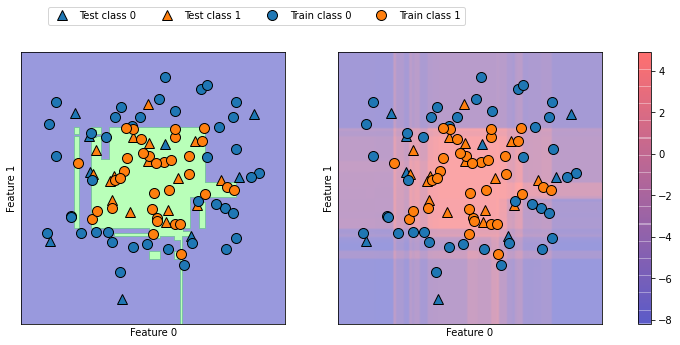

In [40]:
fig, axes = plt.subplots(1, 2, figsize=(13, 5))

mglearn.plots.plot_2d_separator(model, X, fill=True,
                                alpha=.4, cm=mglearn.cm3, ax=axes[0])
score_images = mglearn.tools.plot_2d_scores(model, X,
                                               alpha=.4, cm=mglearn.ReBl, ax=axes[1])
# scores_image = mglearn.tools.plot_2d_scores(model, X, ax=axes[1],
#                                             alpha=.4, cm=mglearn.ReBl)

for ax in axes:
  mglearn.discrete_scatter(X_test[:, 0], X_test[:, 1], y_test, markers='^', ax=ax)
  mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train, markers='o', ax=ax)

  ax.set_xlabel('Feature 0')
  ax.set_ylabel('Feature 1')

cbar = plt.colorbar(score_images, ax=axes.tolist())
axes[0].legend(["Test class 0", "Test class 1", "Train class 0",
                "Train class 1"], ncol=4, loc=(.1, 1.1))
plt.show()

### **predict_proba**

In [42]:
print("predict_proba(X_test).shape \n", model.predict_proba(X_test).shape)

predict_proba(X_test).shape 
 (25, 2)


Probalité d'appartenir à la prémière ou la deuxième classe est décrité si bas pour chaque entrée.

Voici l'example avec le 6 prémières données

In [46]:
model.predict_proba(X_test)[:6]

array([[0.01573626, 0.98426374],
       [0.84575653, 0.15424347],
       [0.98112869, 0.01887131],
       [0.97407033, 0.02592967],
       [0.01352142, 0.98647858],
       [0.02504637, 0.97495363]])

In [48]:
y_test[:6]

array([1, 0, 0, 0, 1, 1])

## **Estimation de l'incertitude pour la classification multiclasse**

Les deux methodes(decision_function() et predict_proba()) fonctionnent aussi pour le cas de la classification multiclasse

In [49]:
from sklearn.datasets import load_iris

In [50]:
iris = load_iris()

In [52]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [53]:
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target,
                                                    random_state=42)

In [54]:
model = GradientBoostingClassifier(learning_rate=0.01, random_state=0)
model.fit(X_train, y_train)

GradientBoostingClassifier(learning_rate=0.01, random_state=0)

**Fonction de décision pour la multiclasse**

In [60]:
print("Decision function shape:\n", model.decision_function(X_test).shape)
print("\nDecision function:\n", model.decision_function(X_test)[:6, :])

Decision function shape:
 (38, 3)

Decision function:
 [[-1.995715    0.04758267 -1.92720695]
 [ 0.06146394 -1.90755736 -1.92793758]
 [-1.99058203 -1.87637861  0.09686725]
 [-1.995715    0.04758267 -1.92720695]
 [-1.99730159 -0.13469108 -1.20341483]
 [ 0.06146394 -1.90755736 -1.92793758]]


**Trouver la prédiction**

Chaque classe envoie un **score de certitude** et la classe ayant un **score plus grand** est celle qui est prédite.

On peut trouver le score plus grand grâce à l'attribut argmax de numpy

In [65]:
decision = np.argmax(model.decision_function(X_test), axis=1)
decision

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 1, 0, 0, 2, 1, 0])

In [64]:
model.predict(X_test)

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 1, 0, 0, 2, 1, 0])

In [66]:
np.all(decision == model.predict(X_test))

True

### **Probalité de prédiction pour la classification multiclasse**

In [67]:
model.predict_proba(X_test)

array([[0.10217718, 0.78840034, 0.10942248],
       [0.78347147, 0.10936745, 0.10716108],
       [0.09818072, 0.11005864, 0.79176065],
       [0.10217718, 0.78840034, 0.10942248],
       [0.10360005, 0.66723901, 0.22916094],
       [0.78347147, 0.10936745, 0.10716108],
       [0.10217718, 0.78840034, 0.10942248],
       [0.09763381, 0.11012538, 0.79224081],
       [0.10217718, 0.78840034, 0.10942248],
       [0.10217718, 0.78840034, 0.10942248],
       [0.09905185, 0.11172485, 0.78922331],
       [0.78347147, 0.10936745, 0.10716108],
       [0.78347147, 0.10936745, 0.10716108],
       [0.78347147, 0.10936745, 0.10716108],
       [0.78347147, 0.10936745, 0.10716108],
       [0.10217718, 0.78840034, 0.10942248],
       [0.09815477, 0.1100618 , 0.79178343],
       [0.10217718, 0.78840034, 0.10942248],
       [0.10217718, 0.78840034, 0.10942248],
       [0.09815477, 0.1100618 , 0.79178343],
       [0.78347147, 0.10936745, 0.10716108],
       [0.10178234, 0.11626145, 0.78195621],
       [0.

In [68]:
model.predict_proba(X_test).sum(axis=1)

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1.])

In [70]:
prob_pred = model.predict_proba(X_test).argmax(axis=1)
prob_pred

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 1, 0, 0, 2, 1, 0])

In [71]:
np.all(decision == model.predict(X_test))

True